#### Import the packages

In [4]:
import librosa
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn
import numpy as np

#### Load the data

In [21]:
# Load audio file
audio_path = 'D:/data/classification_data/data/coughs/fsd_43.wav'
audio_data, sample_rate = librosa.load(audio_path)

# Print audio data and sample rate
print("Audio Data:", audio_data)
print("Sample Rate:", sample_rate)

Audio Data: [-1.1358224e-04 -2.3335777e-04 -1.7207861e-04 ... -2.2309550e-05
  2.6016849e-05 -2.0010495e-05]
Sample Rate: 22050


#### Spectrogram image

##### Cough spectrogram

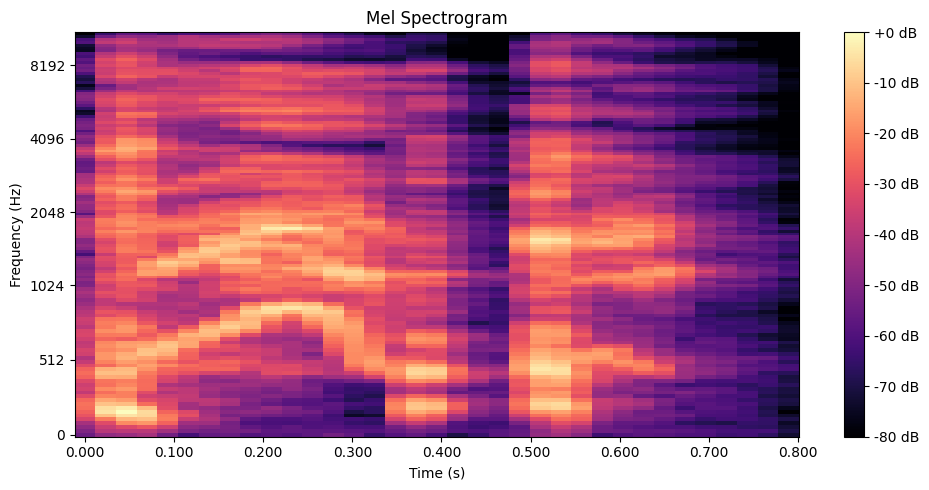

In [22]:
# Generate spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)  # Convert to dB scale

# Plot spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

##### Not cough spectrogram

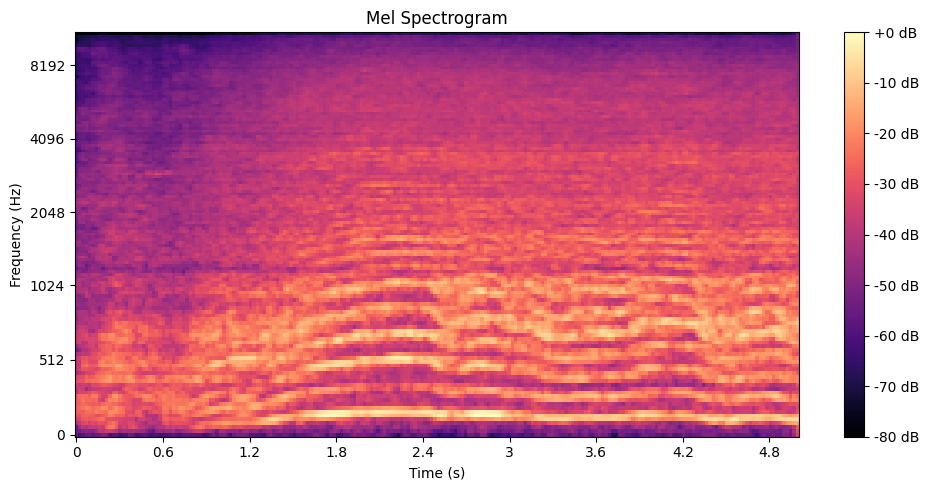

In [18]:
# Load audio file
audio_path = 'D:/data/classification_data/data/not_coughs/esc_25.wav'
audio_data, sample_rate = librosa.load(audio_path)
# Generate spectrogram
spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)  # Convert to dB scale

# Plot spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

##### Approch 2 to generate Spectrogram

In [23]:
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile

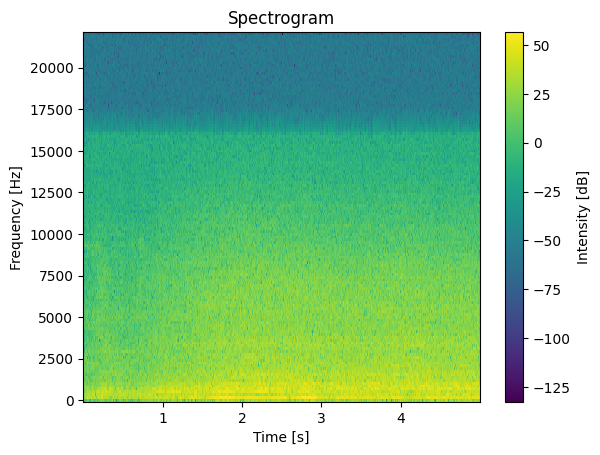

In [24]:
# Load audio file
sample_rate, samples = wavfile.read('D:/data/classification_data/data/not_coughs/esc_25.wav')

# Generate spectrogram
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

# Plot spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()

#### Approach 3 

In [7]:
import librosa
import librosa.display
import numpy as np
from PIL import Image

# Load audio file and generate spectrogram
y, sr = librosa.load('D:/data/classification_data/data/coughs/esc_25.wav')
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Normalize spectrogram data to [0, 255] range
spectrogram_norm = (spectrogram_db - np.min(spectrogram_db)) / (np.max(spectrogram_db) - np.min(spectrogram_db)) * 255

# Convert spectrogram to uint8 format
spectrogram_uint8 = np.uint8(spectrogram_norm)

# Resize spectrogram image to a fixed size (e.g., 224x224)
spectrogram_img = Image.fromarray(spectrogram_uint8)
spectrogram_img = spectrogram_img.resize((224, 224))

# Save spectrogram image to disk
spectrogram_img.save('D:/data/classification_data/sample/coughs_img/esc_25.png')

# Display the spectrogram image
spectrogram_img.show()


##### Generate specrogram for cough

In [12]:
for i in range(1,26):
    #filename=f"esc_{i}"
    filename=f"fsd_{i}"
    # Load audio file and generate spectrogram
    y, sr = librosa.load('D:/data/classification_data/data/coughs/'+filename+".wav")
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Normalize spectrogram data to [0, 255] range
    spectrogram_norm = (spectrogram_db - np.min(spectrogram_db)) / (np.max(spectrogram_db) - np.min(spectrogram_db)) * 255

# Convert spectrogram to uint8 format
    spectrogram_uint8 = np.uint8(spectrogram_norm)

# Resize spectrogram image to a fixed size (e.g., 224x224)
    spectrogram_img = Image.fromarray(spectrogram_uint8)
    spectrogram_img = spectrogram_img.resize((224, 224))

# Save spectrogram image to disk
    spectrogram_img.save('D:/data/classification_data/sample/coughs_img/'+filename+".png")

# Display the spectrogram image
#spectrogram_img.show()
    

##### Generate specrogram for not cough

In [21]:
for i in range(41,46):
    #filename=f"esc_{i}"
    filename=f"fsd_{i}"
    # Load audio file and generate spectrogram
    y, sr = librosa.load('D:/data/classification_data/data/not_coughs/'+filename+".wav")
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Normalize spectrogram data to [0, 255] range
    spectrogram_norm = (spectrogram_db - np.min(spectrogram_db)) / (np.max(spectrogram_db) - np.min(spectrogram_db)) * 255

# Convert spectrogram to uint8 format
    spectrogram_uint8 = np.uint8(spectrogram_norm)

# Resize spectrogram image to a fixed size (e.g., 224x224)
    spectrogram_img = Image.fromarray(spectrogram_uint8)
    spectrogram_img = spectrogram_img.resize((224, 224))

# Save spectrogram image to disk
    spectrogram_img.save('D:/data/classification_data/sample/test/not_coughs_img/'+filename+".png")

# Display the spectrogram image
#spectrogram_img.show()
    